In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [193]:
def interpolate(t, degree, points, knots=[], weights=[]):
    n = len(points)
    d = len(points[0])

    if degree < 1:
        print("degree must be at least 1 (linear)")
        return None
    if degree > (n-1):
        print("degree must be less than or equal to point count - 1")
        return None

    if len(weights) == 0:
        # build weight vector of length [n]
        weights = [1]*n
    
    if len(knots) == 0:
        # build knot vector of length [n + degree + 1]
        knots = [i for i in range(n+degree+1)]
    elif len(knots) != n+degree+1:
        print("bad knot vector length")
        return None
    
    domain = [degree, len(knots)-1-degree]
    # domain = [degree, len(knots)-1-degree]

    low = knots[domain[0]]
    high = knots[domain[1]]

    # map given t to [low, high]
    t = t * (high - low) + low

    if t < low or t > high:
        print("out of bounds")
        return None

    # find s (the spline segment) for the [t] value provided
    for s in range(domain[0], domain[1]):
        if knots[s] <= t <= knots[s+1]:
            break
    
    # convert points to homogeneous coordinates
    v = [0]*n
    for i in range(n):
        v[i] = [0]*(d+1)
        for j in range(d):
            v[i][j] = points[i][j] * weights[i]
        v[i][d] = weights[i]

    # l (level) goes from 1 to the curve degree + 1
    for l in range(1, degree+2):
        # build level l of the pyramid
        for i in range(s, s-degree-1+l, -1):
            alpha = (t - knots[i]) / (knots[i+degree+1-l] - knots[i])
            # interpolate each component
            for j in range(d+1):
                v[i][j] = (alpha * v[i][j]) + ((1 - alpha) * v[i-1][j])

    
    # convert back to cartesian and return
    result = [0]*d
    for i in range(d):
        result[i] = v[s][i] / v[s][d]

    return result

def plot_interpolation(points, result):
    plt.figure()
    plt.plot(result[:,0], result[:,1], 'b', lw=2)
    plt.plot(points[:,0], points[:,1], 'r--', lw=1)
    plt.scatter(points[:,0], points[:,1], c='g')
    plt.show()

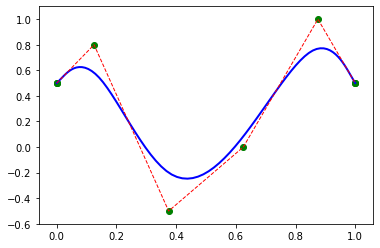

In [194]:
# points = [[0, 5],
#           [1, 9],
#           [2, 1],
#           [3, 10],
#           [4, 0],
#           [5, 9],
#           [6, 1]]

points = [[0.000, 0.5],
          [0.000, 0.5],
          [0.000, 0.5],
          [0.125, 0.8],
          [0.375, -0.5],
          [0.625, 0.0],
          [0.875, 1.0],
          [1.000, 0.5],
          [1.000, 0.5],
          [1.000, 0.5]]

degree = 3
result_list  = []
for i in np.linspace(0, 1, 100):
    result = interpolate(i, degree, points)
    result_list.append(result)

plot_interpolation(np.array(points), np.array(result_list))